# Telco Customer Churn
## Author: Eren ERİŞ
Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

Desription : A model was studied that predicts whether Telecom customers will leave or not in a data set.  Machine learning and Deep Neural networks were used as models

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,f1_score
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

import tensorflow as tf 
from tensorflow import keras 

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
print("Eğitim setinde NaN değer sayısı:", df.isna().sum().sum())


Eğitim setinde NaN değer sayısı: 11


In [35]:
df = df.dropna()

In [36]:
print("Eğitim setinde NaN değer sayısı:", df.isna().sum().sum())

Eğitim setinde NaN değer sayısı: 0


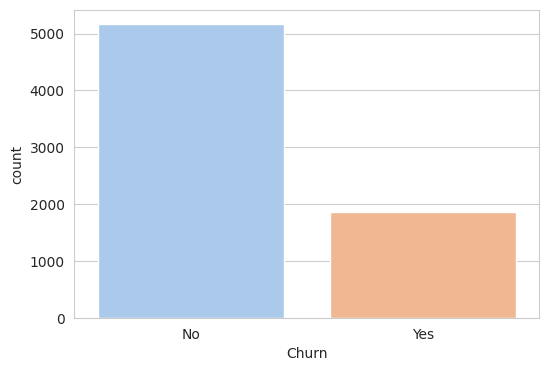

In [37]:
plt.figure(figsize = (6,4))

sns.countplot(data = df, x = 'Churn')
plt.show()

In [38]:
#Churn Çıkışını Değiştirme
df.Recurred = df.Churn.replace({'No': 0, 'Yes': 1})

/tmp/ipykernel_43/2856972041.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Recurred = df.Churn.replace({'No': 0, 'Yes': 1})


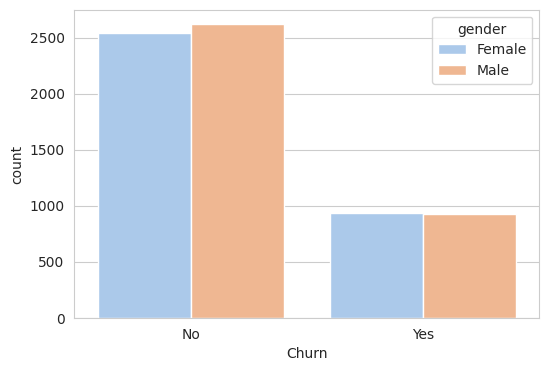

In [39]:
plt.figure(figsize = (6,4))

sns.countplot(data = df, x = 'Churn' , hue="gender")
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [41]:
df["TotalCharges"] =  pd.to_numeric(df['TotalCharges'], errors='coerce')


/tmp/ipykernel_43/3070493598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalCharges"] =  pd.to_numeric(df['TotalCharges'], errors='coerce')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
ordinal_cols = ['gender', 'Partner', 'Dependents',
       'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies',  'PaperlessBilling',
       ]

ordinal = df[ordinal_cols]

ordinal_pipeline = Pipeline([('ordinal encoder', OrdinalEncoder())])

ordinal_tr = ordinal_pipeline.fit_transform(ordinal)
ordinal_tr

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 2., 2., 1.]])

In [45]:
cat_cols = ['MultipleLines','InternetService','Contract','PaymentMethod']

cat = df[cat_cols]

cat_pipeline = Pipeline([
    ('one hot encoder', OneHotEncoder())
])

cat_tr = cat_pipeline.fit_transform(cat)
cat_tr = cat_tr.toarray()
cat_tr

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [46]:
num_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

num = df[num_cols]

num_pipeline = Pipeline([
    ('scale', StandardScaler())
])

num_tr = num_pipeline.fit_transform(num)
num_tr[0:5]

array([[-0.44032709, -1.28024804, -1.16169394, -0.99419409],
       [-0.44032709,  0.06430269, -0.26087792, -0.17373982],
       [-0.44032709, -1.23950408, -0.36392329, -0.95964911],
       [-0.44032709,  0.51248626, -0.74785042, -0.19524771],
       [-0.44032709, -1.23950408,  0.19617818, -0.94045745]])

In [47]:
full_pipeline = ColumnTransformer([
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('categorical', cat_pipeline, cat_cols),
    ('numerical', num_pipeline, num_cols)
])

data_prepared = full_pipeline.fit_transform(df)
data_prepared

array([[ 0.        ,  1.        ,  0.        , ..., -1.28024804,
        -1.16169394, -0.99419409],
       [ 1.        ,  0.        ,  0.        , ...,  0.06430269,
        -0.26087792, -0.17373982],
       [ 1.        ,  0.        ,  0.        , ..., -1.23950408,
        -0.36392329, -0.95964911],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.87280842,
        -1.17000405, -0.85451414],
       [ 1.        ,  1.        ,  0.        , ..., -1.15801615,
         0.31916782, -0.87209546],
       [ 1.        ,  0.        ,  0.        , ...,  1.36810945,
         1.35793167,  2.01234407]])

In [48]:
X = data_prepared
y = df.Recurred

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 21)

In [49]:
def getModel(model , x_train , y_train , x_test , y_test):
    mod = model.fit(x_train , y_train)
    predict = model.predict(x_test)
    print("------------Accury Score------------")
    print(accuracy_score(predict,y_test))
    print("------------Classification Report------------")
    print(classification_report(predict,y_test))
    sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='.2f',cmap="crest")

------------Accury Score------------
0.7931769722814499
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1104
           1       0.52      0.68      0.59       303

    accuracy                           0.79      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.82      0.79      0.80      1407



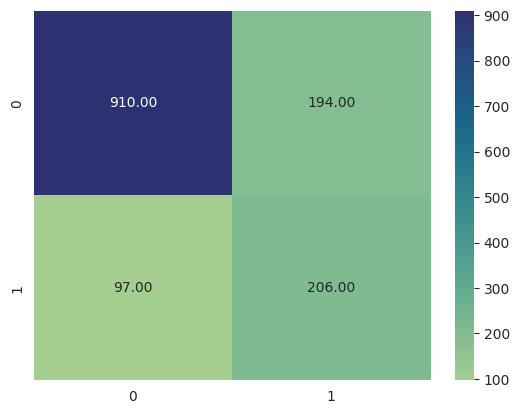

In [50]:
getModel(XGBClassifier(n_estimators = 100, max_depth = 10, gamma = 1, learning_rate = .1),X_train, y_train ,X_test, y_test)

------------Accury Score------------
0.7874911158493249
------------Classification Report------------
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1120
           1       0.48      0.68      0.56       287

    accuracy                           0.79      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.82      0.79      0.80      1407



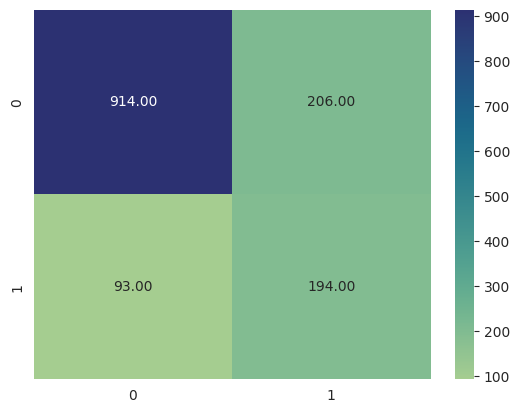

In [51]:
getModel(RandomForestClassifier(),X_train, y_train ,X_test, y_test)

In [54]:
X_train.shape

(5625, 28)

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(28,input_shape=(28,),activation='relu'),
    keras.layers.Dense(130,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=300)

Epoch 1/300
176/176 [==============================] - 2s 2ms/step - loss: 0.4612 - accuracy: 0.7710
Epoch 2/300
176/176 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.7932
Epoch 3/300
176/176 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7996
Epoch 4/300
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8004
Epoch 5/300
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8039
Epoch 6/300
176/176 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8124
Epoch 7/300
176/176 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8121
Epoch 8/300
176/176 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8128
Epoch 9/300
176/176 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8146
Epoch 10/300
176/176 [==============================] - 0s 2ms/step - loss: 0.3929 - accura

In [57]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 1.8669 - accuracy: 0.7363


[1.8668791055679321, 0.7363184094429016]

In [58]:
yp=model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [59]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else: 
        y_pred.append(0)

In [60]:
cm = tf.math.confusion_matrix(y_test,y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[851, 156],
       [215, 185]], dtype=int32)>

<Axes: >

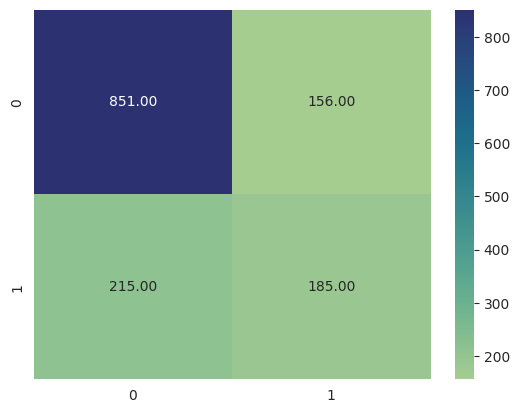

In [62]:
sns.heatmap(cm,annot=True,fmt='.2f',cmap="crest")